<a href="https://colab.research.google.com/github/tikooshrishti/Analytics/blob/main/LEGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
colors_df = pd.read_csv('colors.csv')
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [8]:
colors_df['name'].nunique()

135

In [15]:
colors_df.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

In [16]:
sets_df = pd.read_csv('sets.csv')
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [21]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

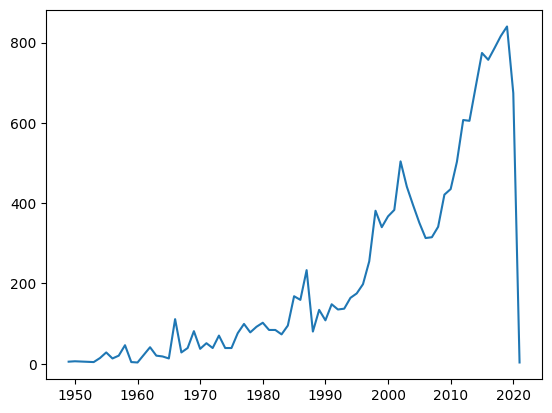

In [22]:
#chart
plt.plot(sets_by_year.index, sets_by_year.set_num)

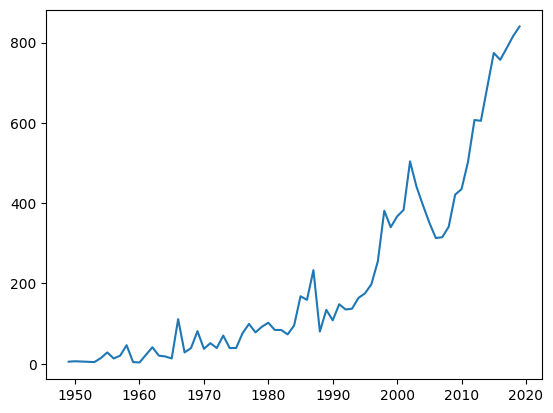

In [23]:
#including last 2 years
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [24]:
theme_df = pd.read_csv('themes.csv')
theme_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [27]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace = True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


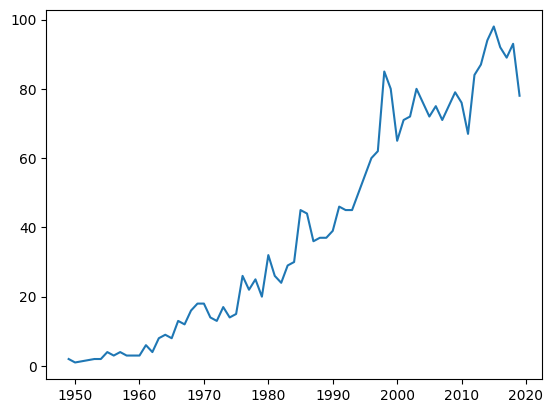

In [29]:
#chart
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Text(0, 0.5, 'Number of themes')

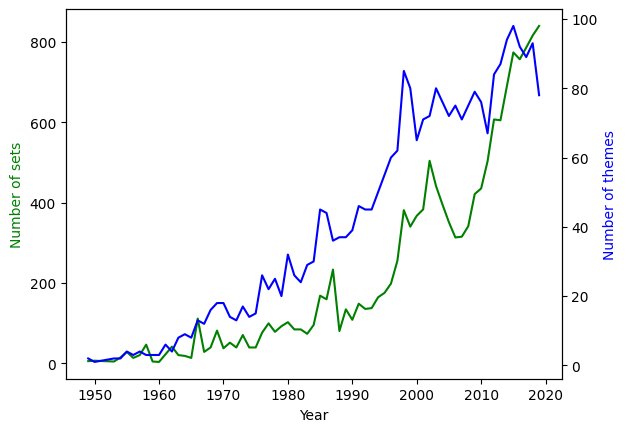

In [33]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='green')
ax2.set_ylabel('Number of themes', color='blue')

In [34]:
parts_per_set = sets_df.groupby('year').agg({"num_parts": pd.Series.mean})

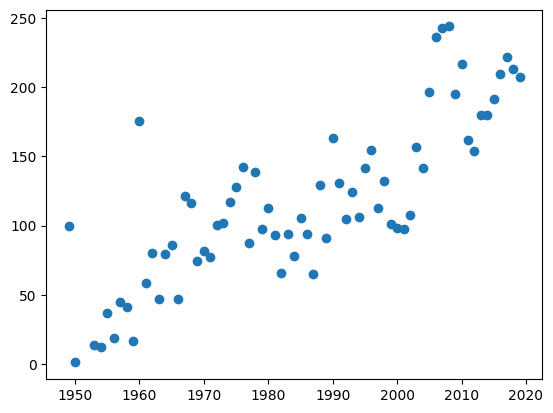

In [35]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

<img src="https://i.imgur.com/Sg4lcjx.png">

In [41]:
theme_df = pd.read_csv('themes.csv')
theme_df.head()
theme_df[theme_df.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [52]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [53]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values}) # Change the variable name to avoid overwriting
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [57]:
merged_df = pd.merge(set_theme_count, theme_df, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

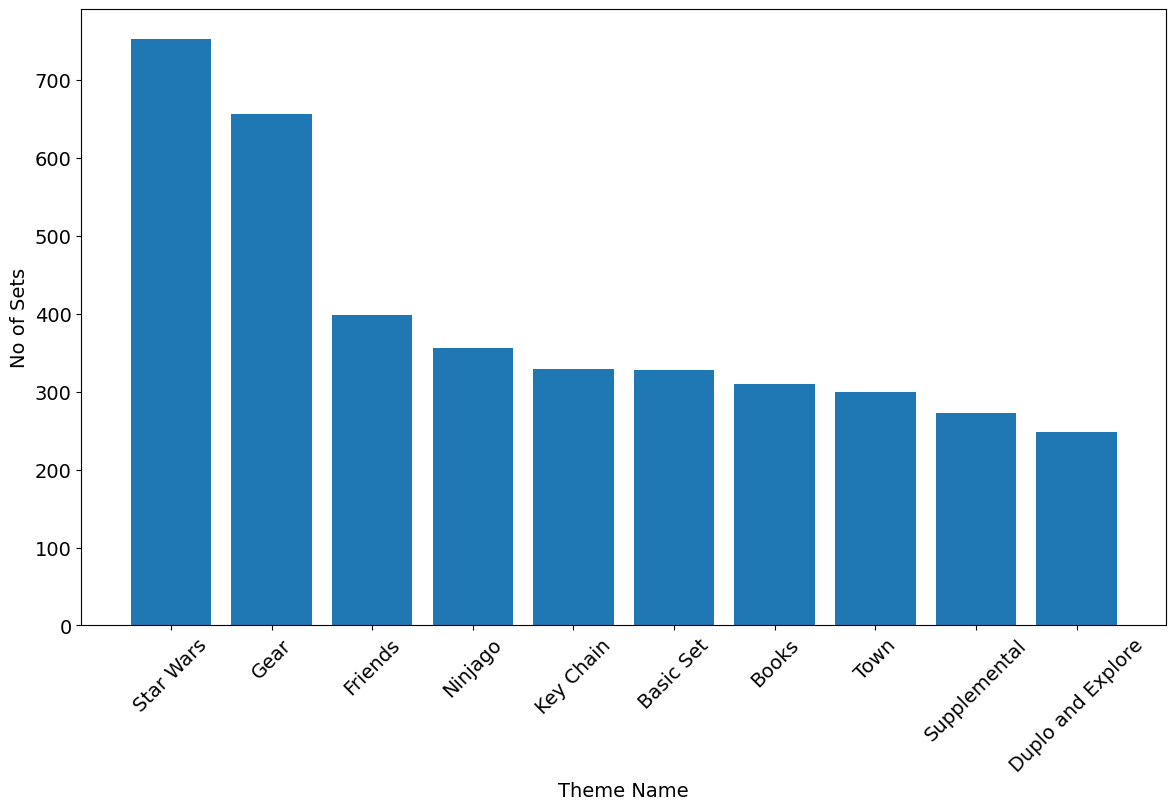

In [63]:
#Bar chart
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('No of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])